In [1]:
import sys
sys.path.append("src")
from qaoa.core.QAOA import QAOArunner
from  qaoa.models.MaxCutProblem import MaxCutProblem
import  qaoa.models.params as params
from rustworkx.visualization import mpl_draw as draw_graph
from old_jupyter_vizualisers.load_data import load_graph_from_csv
import numpy as np

In [2]:
import itertools

settings = {
'backend_mode' : ['noisy_sampling'], #nois_sampling
'qaoa_variant': ['vanilla'],#,'multiangle'
'param_initialization': ['gaussian'],
'depth':[2,4,6,8,10],#MANGLER 10 PÅ MULTIANGLE
'warm_start': [False,True],
'vertexcover': [True]
}

keys = settings.keys()
values = settings.values()

combinations = [dict(zip(keys, combination)) for combination in itertools.product(*values)]
print(f'echo "{combinations}" > qaoa_settings.txt')
#print(len(combinations))

echo "[{'backend_mode': 'noisy_sampling', 'qaoa_variant': 'vanilla', 'param_initialization': 'gaussian', 'depth': 2, 'warm_start': False, 'vertexcover': True}, {'backend_mode': 'noisy_sampling', 'qaoa_variant': 'vanilla', 'param_initialization': 'gaussian', 'depth': 2, 'warm_start': True, 'vertexcover': True}, {'backend_mode': 'noisy_sampling', 'qaoa_variant': 'vanilla', 'param_initialization': 'gaussian', 'depth': 4, 'warm_start': False, 'vertexcover': True}, {'backend_mode': 'noisy_sampling', 'qaoa_variant': 'vanilla', 'param_initialization': 'gaussian', 'depth': 4, 'warm_start': True, 'vertexcover': True}, {'backend_mode': 'noisy_sampling', 'qaoa_variant': 'vanilla', 'param_initialization': 'gaussian', 'depth': 6, 'warm_start': False, 'vertexcover': True}, {'backend_mode': 'noisy_sampling', 'qaoa_variant': 'vanilla', 'param_initialization': 'gaussian', 'depth': 6, 'warm_start': True, 'vertexcover': True}, {'backend_mode': 'noisy_sampling', 'qaoa_variant': 'vanilla', 'param_initializ

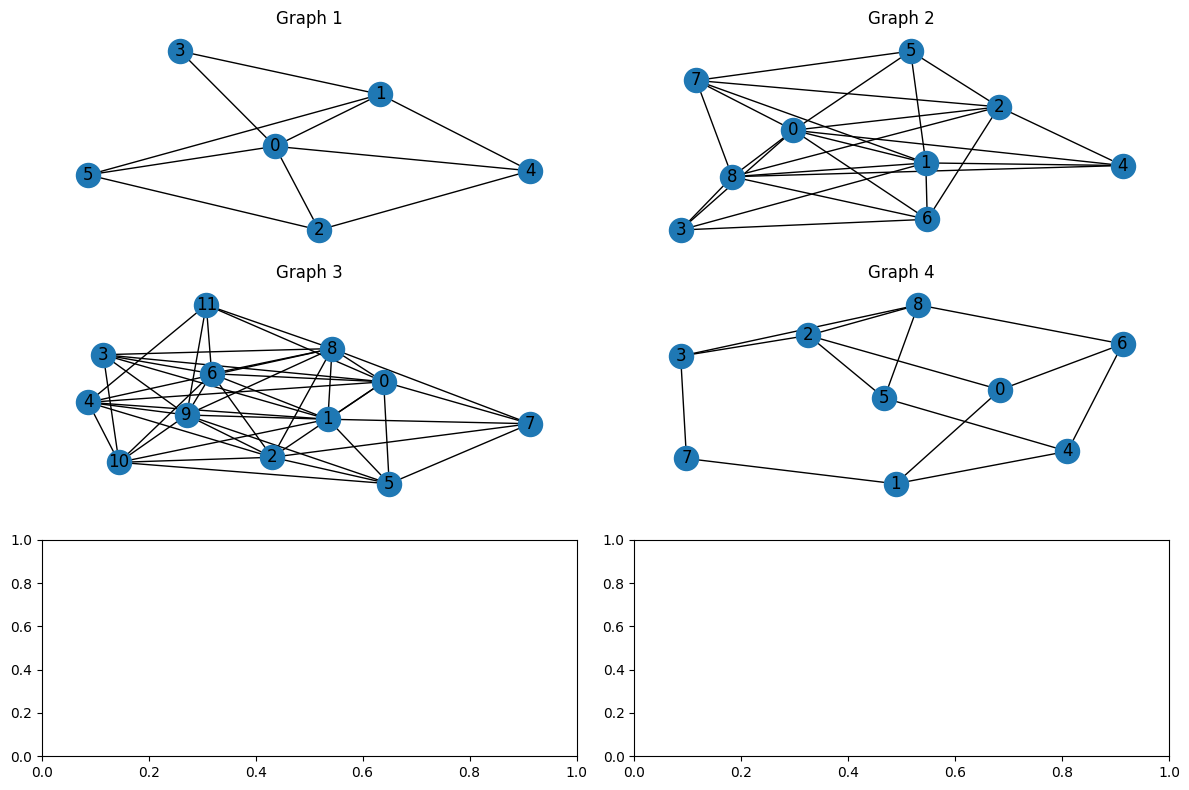

In [3]:

problem = MaxCutProblem()
graphs = problem.get_erdos_renyi_graphs_paper1()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,2, figsize=(12, 8))
axes = axes.flatten()

for idx, graph in enumerate(graphs):
    draw_graph(graph, ax=axes[idx], with_labels=True)
    axes[idx].set_title(f"Graph {idx+1}")

plt.tight_layout()
plt.show()

SparsePauliOp(['IIIIIIIZI', 'IIIIIIIIZ', 'IIIIIIZII', 'IIIIIZIII', 'IIIIZIIII', 'IIIZIIIII', 'IIZIIIIII', 'IZIIIIIII', 'ZIIIIIIII', 'IIIIIIIZZ', 'IIIIIIZIZ', 'IIZIIIIIZ', 'IIIIZIIZI', 'IZIIIIIZI', 'IIIIIZZII', 'IIIZIIZII', 'ZIIIIIZII', 'IZIIIZIII', 'ZIIIIZIII', 'IIIZZIIII', 'IIZIZIIII', 'ZIIZIIIII', 'ZIZIIIIII'],
              coeffs=[1. +0.j, 1. +0.j, 1.5+0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 0.5+0.j,
 1.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])
[1, 0, 1, 0, 1, 0, 0, 1, 1]
5
3291
[3.68586517 1.61004274 3.22255232 1.55644966 3.31787661 1.42230451
 3.28970905 1.55633819 3.12142263 1.57904962 3.02151646 1.66481147
 2.91944619 1.57648614 3.15421229 1.51871483 3.03092288 1.53119746
 3.05829618 1.48477021 3.24314766 1.56333957 3.12249017 1.34981212
 3.22134389 1.5323005  3.18802056 1.87322241 3.21317576 1.66987011
 3.19661806 1.58990214 3.27691763 1.63955108 3.23357926 2.3373381
 3.7287618  1.411

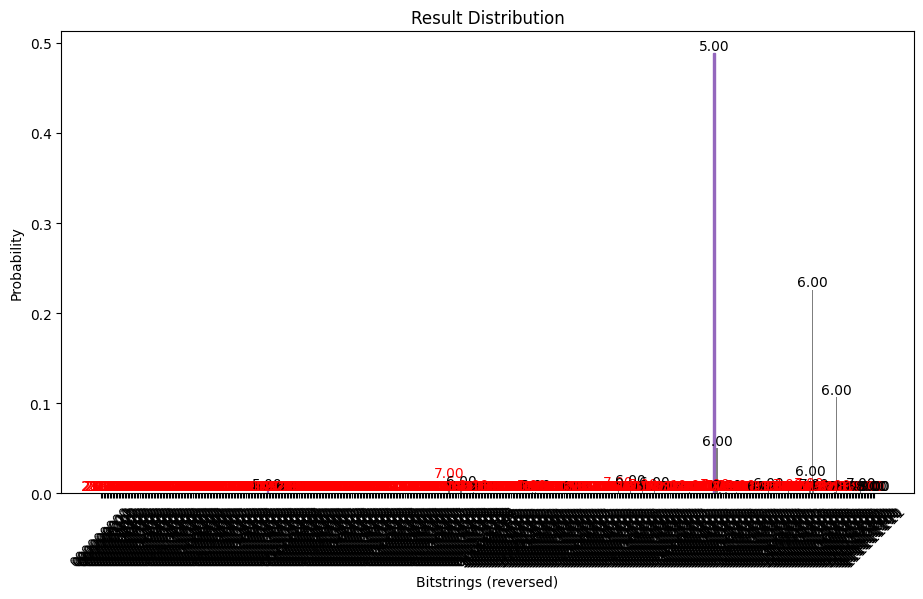

In [7]:

quantum = QAOArunner(graph=graph, 
                     backend_mode = 'statevector',
                     param_initialization= 'gaussian',
                     qaoa_variant='vanilla', 
                     optimizer='COBYLA',
                     depth =40,
                     vertexcover=True,
                     amount_shots = 1000,
                     max_tol = 1e-2,#lower shots and tolerance for faster runs
     
                     )

quantum.build_circuit()
print(quantum.cost_hamiltonian)
quantum.run()
#print(f'Total time: {quantum.time_elapsed} in which {np.sum(quantum.runtimes)/quantum.time_elapsed:.2f}% was spent inside the cost_func_estimator and {1 - np.sum(quantum.runtimes)/quantum.time_elapsed:.2f} inside optimizer and help functions.')
#removed timer statements from qaoa so above line does not work
print(quantum.solution)
print(quantum.evaluate_solution())
print(quantum.fev)
print(quantum.final_params)
print('m',quantum.get_prob_measure_optimal())
quantum.print_bitstrings()

[1.0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0]


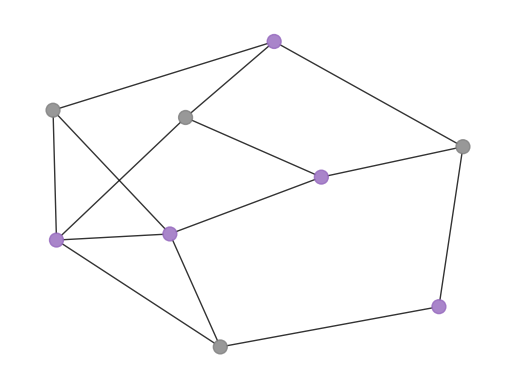

In [5]:
print(quantum.classical_solution)
quantum.solver.plot_result()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from qiskit_ibm_runtime import EstimatorV2 as Estimator
# Define the grid resolution
num_points = 100
gamma_vals = np.linspace(0, 4 * np.pi, num_points)
beta_vals = np.linspace(0,2* np.pi, num_points)
Gamma, Beta = np.meshgrid(gamma_vals, beta_vals)
Z = np.zeros_like(Gamma)



minvertexcover = False

quantum = QAOArunner(graph=graph, 
                     backend_mode='statevector',
                     param_initialization= 'gaussian',
                     qaoa_variant='vanilla', 
                     optimizer='COBYLA',
                     warm_start=False,
                     depth = 1,
                     vertexcover=minvertexcover,
                     amount_shots = 1000,
                     max_tol = 1e-8,
                     lagrangian_multiplier=2
                     )
quantum.build_circuit()
estimator = Estimator(mode=quantum.backend)
estimator.options.default_shots = 5000
# Evaluate cost function at each grid point



for i in tqdm(range(Gamma.shape[0]), desc="Evaluating energy landscape"):
    for j in range(Gamma.shape[1]):
        params = np.array([Gamma[i, j], Beta[i, j]])  # Format your params as needed
        Z[i, j] = quantum.cost_func_estimator(params, quantum.circuit, quantum.cost_hamiltonian,estimator)

# Plot the energy landscape
plt.figure(figsize=(8, 6))
cp = plt.contourf(Gamma, Beta, Z, levels=50)
plt.colorbar(cp, label='Energy')
plt.title("Energy Landscape over [γ, β]")
plt.xlabel("Gamma (γ)")
plt.ylabel("Beta (β)")
plt.show()


Evaluating energy landscape:   0%|          | 0/100 [00:00<?, ?it/s]


AttributeError: 'QAOArunner' object has no attribute 'cost_func_estimator'

In [ ]:
import pandas as pd

# Save Z as a CSV file
df_z = pd.DataFrame({'x': Gamma.ravel(), 'y': Beta.ravel(), 'z': Z.ravel()})
df_z.columns = ['x', 'y', 'z']
df_z.to_csv('percentage_measure_optimal_erdos_renyi_5_2_MaxCut.csv', index=False)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

strin = 'MinVertexCover' if minvertexcover else 'MaxCut'

import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=Z, x=Gamma, y=Beta, colorscale='Viridis')])
fig.update_layout(
    title=f"Percent chance of sampling optimal solution given [γ, β] for Erdos Renyi graph size 5, high prob of edges, for {strin}",
    scene=dict(
        xaxis_title="Gamma (γ)",
        yaxis_title="Beta (β)",
        zaxis_title="Energy"
    )
)
fig.show()

